## Plotting some early results

In [5]:
# Standard python imports
%matplotlib inline

from os.path import join
import glob
import inspect
from importlib import reload
import warnings

from matplotlib.colors import LogNorm

import numpy as np
import pylab as plt
import pandas as pd

In [19]:
import astropy.io.fits as fits
from astropy.table import Table

# the following commands make plots look better
def plot_prettier(dpi=200, fontsize=10): 
    plt.rcParams['figure.dpi']= dpi
    plt.rc("savefig", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in')
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [2., 2.])
    # if you don't have LaTeX installed on your laptop and this statement 
    # generates error, comment it out
    plt.rc('text', usetex=True)
    
plot_prettier()

In [8]:
def read_fits_table(filename):
    '''
    reads and returns data in a table from a FITS file
    '''
    hdu = fits.open(filename)
    data = Table(hdu[1].data)   # second index of the hdu corresponds to the data in my astropy table files
    hdu.close()
    
    return data

def read_fits_image(filename):
    '''
    reads and returns an image from a FITS file
    '''
    hdu = fits.open(filename)
    data = hdu[0].data
    header = hdu[0].header 
    hdu.close()
    
    return data

In [49]:
# get table of redmagic data
des_data = read_fits_table('/Users/aidan/Desktop/sl_project/results/redmagic_4kqf_test.fits')
sl_data = read_fits_table('/Users/aidan/Desktop/sl_project/results/fitting_98lenses_test.fits')

In [50]:
# DES magnitudes
des_r = des_data['mag_r']
des_g = des_data['mag_g']

sl_r = sl_data['mag_r']
sl_g = sl_data['mag_g']

# DES colors
des_gr = des_g - des_r
sl_gr = sl_g - sl_r

In [51]:

des_filt = (np.isfinite(des_r) & np.isfinite(des_g) & np.isfinite(des_gr))
des_r_filt = des_r[des_filt]
des_g_filt = des_g[des_filt]
des_gr_filt = des_gr[des_filt]

# DES Sersic photometry parameters

plate_scale = 0.263                                 # arcsec per pixel

des_nr = des_data['nr'][des_filt]                   # Sersic index
des_rr = des_data['Rr'][des_filt] * plate_scale     # half-light radius (in arcsec)
des_ng = des_data['ng'][des_filt]
des_rg = des_data['Rg'][des_filt] * plate_scale

sl_nr = sl_data['nr']                               # Sersic index
sl_rr = sl_data['Rr'] * plate_scale                 # half-light radius (in arcsec)
sl_ng = sl_data['ng']
sl_rg = sl_data['Rg'] * plate_scale

# residual flux values
# this still needs to be scaled with uncertainty, which I need to implement a calculation for

des_resflux_r = des_data['obs_flux_35pm3_r'] - des_data['mod_flux_35pm3_r']
des_resflux_g = des_data['obs_flux_35pm3_g'] - des_data['mod_flux_35pm3_g']

sl_resflux_r = sl_data['obs_flux_35pm3_r'] - sl_data['mod_flux_35pm3_r']
sl_resflux_g = sl_data['obs_flux_35pm3_g'] - sl_data['mod_flux_35pm3_g']


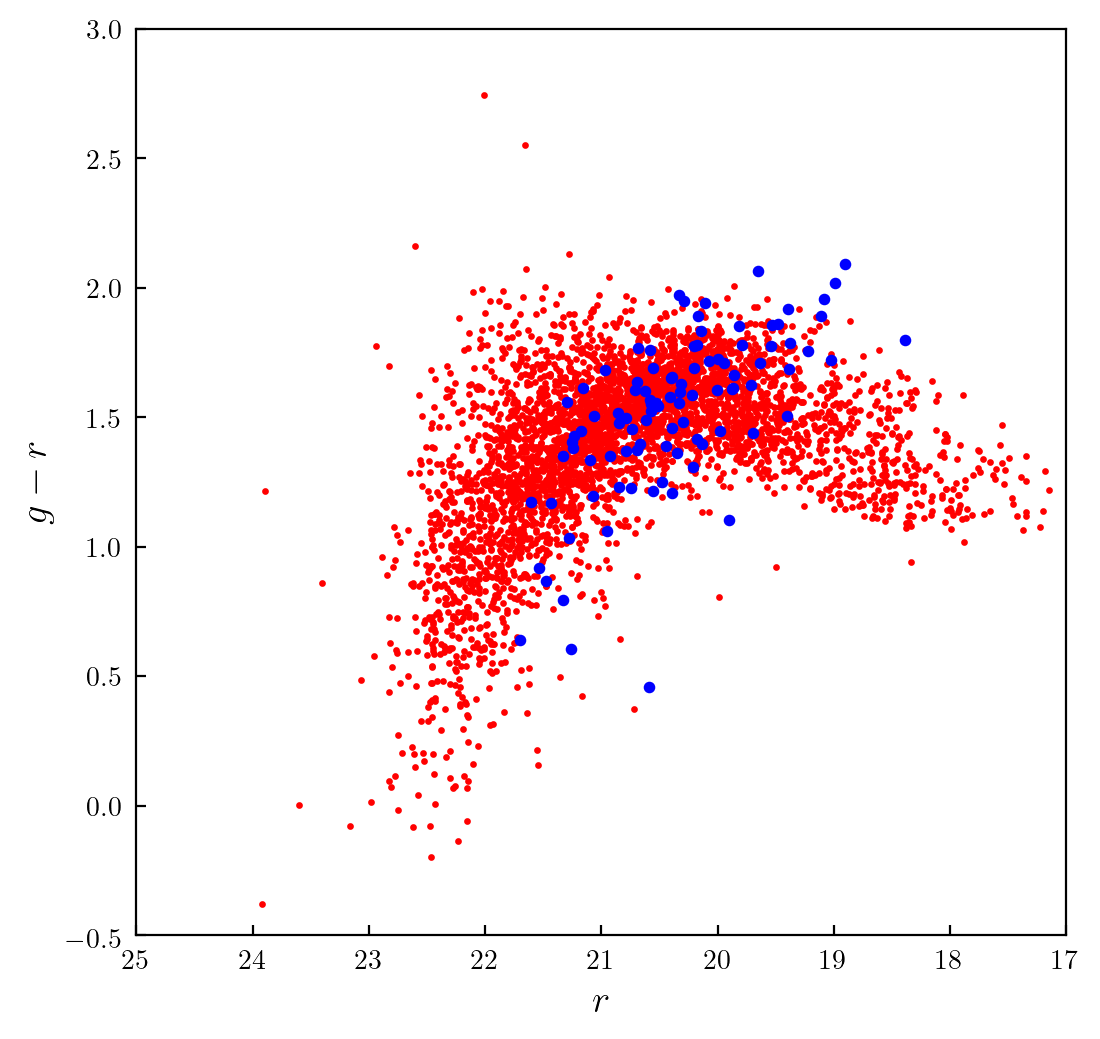

In [52]:
plt.figure(figsize=(6,6))
#plt.hist2d(sdss_r_lowz, sdss_color_lowz, bins=650, norm=LogNorm())
plt.scatter(des_r_filt, des_gr_filt, s=2 
            #, bins=100
            , c='r', label='redMaGiC'
           #, norm=LogNorm()
        )
plt.scatter(sl_r, sl_gr, s=10 
            #, bins=100
            , c='b', label='redMaGiC'
           #, norm=LogNorm()
        )
#plt.scatter(des_g_filt, des_gr_filt, s=3, c='g')
plt.xlabel(r'$r$', fontsize=14)
plt.ylabel(r'$g-r$', fontsize=14)
#plt.legend(loc='upper right')

plt.xlim(17, 25)
plt.ylim(-0.5,3)

plt.gca().invert_xaxis()

(18, 25)

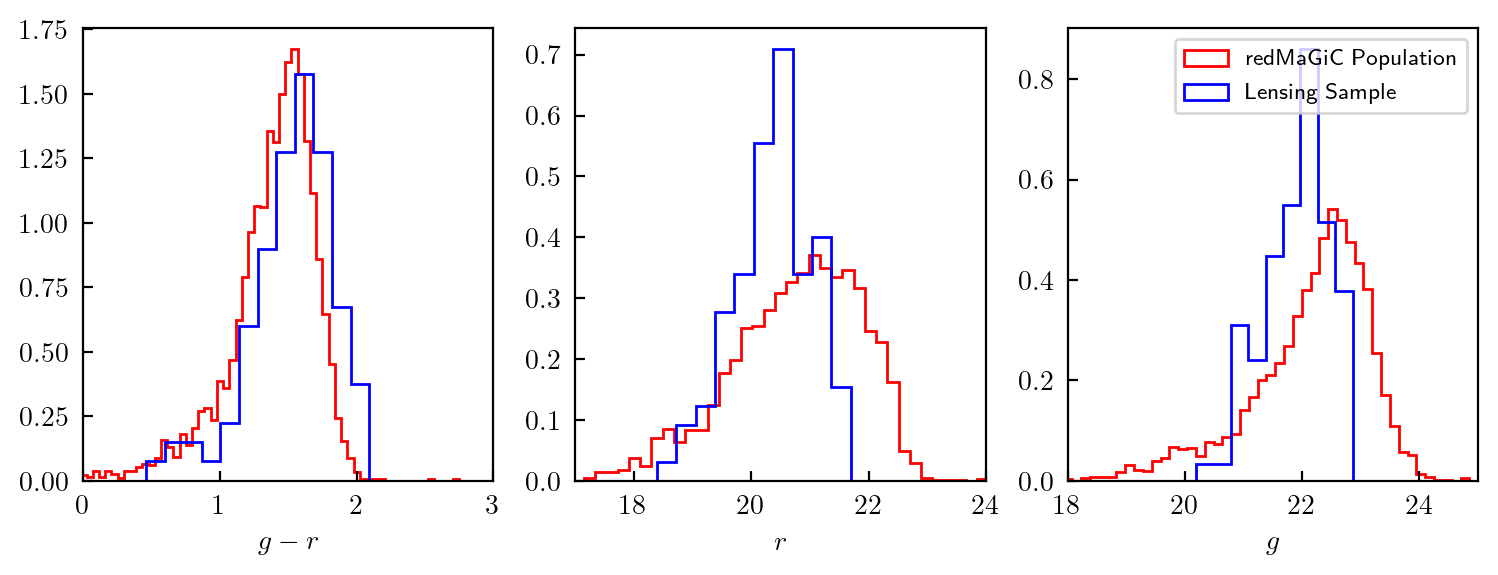

In [57]:
fig, (cplot, magrplot, maggplot) = plt.subplots(1,3, figsize=(9,3))

cplot.hist(des_gr_filt#, des_rr
            , color='r', bins='auto', density=True, histtype='step'
            #, s=3, c='r'
        )

cplot.hist(sl_gr#, des_rr
            , color='b', bins='auto', density=True, histtype='step'
            #, s=3, c='r'
        )

cplot.set_xlabel(r'$g-r$')
cplot.set_xlim(0,3)

magrplot.hist(des_r_filt#, des_rr
            , color='r', bins='auto', density=True, histtype='step'
            #, s=3, c='r'
        )

magrplot.hist(sl_r#, des_rr
            , color='b', bins='auto', density=True, histtype='step'
            #, s=3, c='r'
             )

magrplot.set_xlabel(r'$r$')
magrplot.set_xlim(17,24)

maggplot.hist(des_g_filt#, des_rr
            , color='r', bins='auto', density=True, histtype='step', label='redMaGiC Population'
            #, s=3, c='r'
        )

maggplot.hist(sl_g#, des_rr
            , color='b', bins='auto', density=True, histtype='step', label='Lensing Sample'
            #, s=3, c='r'
             )

maggplot.legend(loc='upper right', fontsize=8)

maggplot.set_xlabel(r'$g$')
maggplot.set_xlim(18,25)

#nplot.set_xlim(0,15)

Below is a plot of observed aperture flux (in thousands of counts per second) against residual aperture flux (observed minus model flux). These fluxes were calculated by placing a 1.841" by 1.841" box around the center of a cutout and calculating the total pixel counts in the box.

Text(0, 0.5, '$\\Delta f_{g}$ (counts $/\\;\\rm{s}$)')

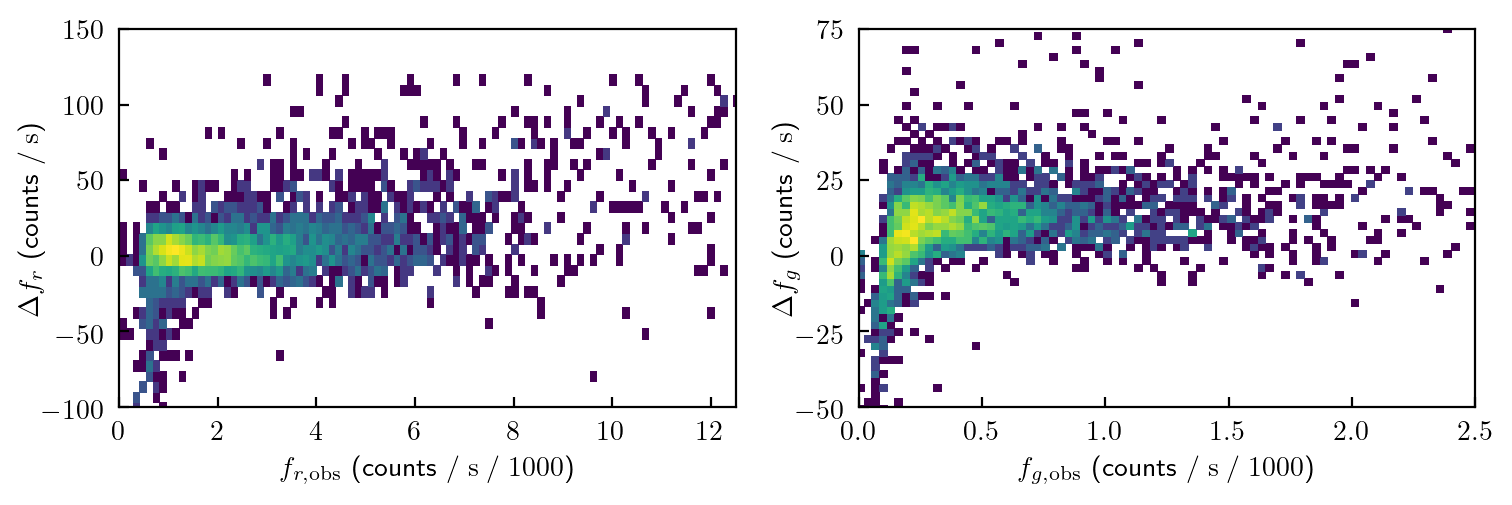

In [54]:
# for a sample of 4000 redmagic galaxies

fig, (resr, resg) = plt.subplots(1,2, figsize=(8.75,2.5))

'''
filtr = (-120 < sl_resflux_r) & (sl_resflux_r < 120) & (sl_data['obs_flux_35pm3_r'] < 16000)
filtg = (-120 < sl_resflux_g) & (sl_resflux_g  < 120) & (sl_data['obs_flux_35pm3_g'] < 2500)

resr.hist2d(sl_data['obs_flux_35pm3_r'][filtr] / 1000
            , sl_resflux_r[filtr]
            , bins=10, cmap='viridis', norm=LogNorm()
           )
resg.hist2d(sl_data['obs_flux_35pm3_g'][filtg] / 1000
            , sl_resflux_g[filtg]
            , bins=10, cmap='viridis', norm=LogNorm()
           )'''


filtr = (des_resflux_r < 120) & (des_data['obs_flux_35pm3_r'] < 16000)
filtg = (des_resflux_g < 120) & (des_data['obs_flux_35pm3_g'] < 2500)

resr.hist2d(des_data['obs_flux_35pm3_r'][filtr] / 1000
            , des_resflux_r[filtr], bins=120, cmap='viridis', norm=LogNorm()
           )
resg.hist2d(des_data['obs_flux_35pm3_g'][filtg] / 1000
            , des_resflux_g[filtg], bins=80, cmap='viridis', norm=LogNorm()
           )
           

resr.set_xlim(0, 12.5)
resg.set_xlim(0, 2.5)

resr.set_ylim(-100, 150)
resg.set_ylim(-50, 75)

resr.set_xlabel(r'$f_{r,\rm{obs}}$ (counts $/\;\rm{s}\;/\;1000$)')
resr.set_ylabel(r'$\Delta f_{r}$ (counts $/\;\rm{s}$)', labelpad=-2)

resg.set_xlabel(r'$f_{g,\rm{obs}}$ (counts $/\;\rm{s}\;/\;1000$)')
resg.set_ylabel(r'$\Delta f_{g}$ (counts $/\;\rm{s}$)', labelpad=-2)

#fig.savefig('/home/acloonan/ASTR285s22/projects/acloonan/first_fig.jpg', format='jpeg')

Below is a set of histograms of a couple of key photometric fitting parameters in the Sérsic profile: effective 'half-light' radius $R_{\rm e}$ and Sérsic index $n$, in both $r$ and $g$ bands.

(0, 2.5)

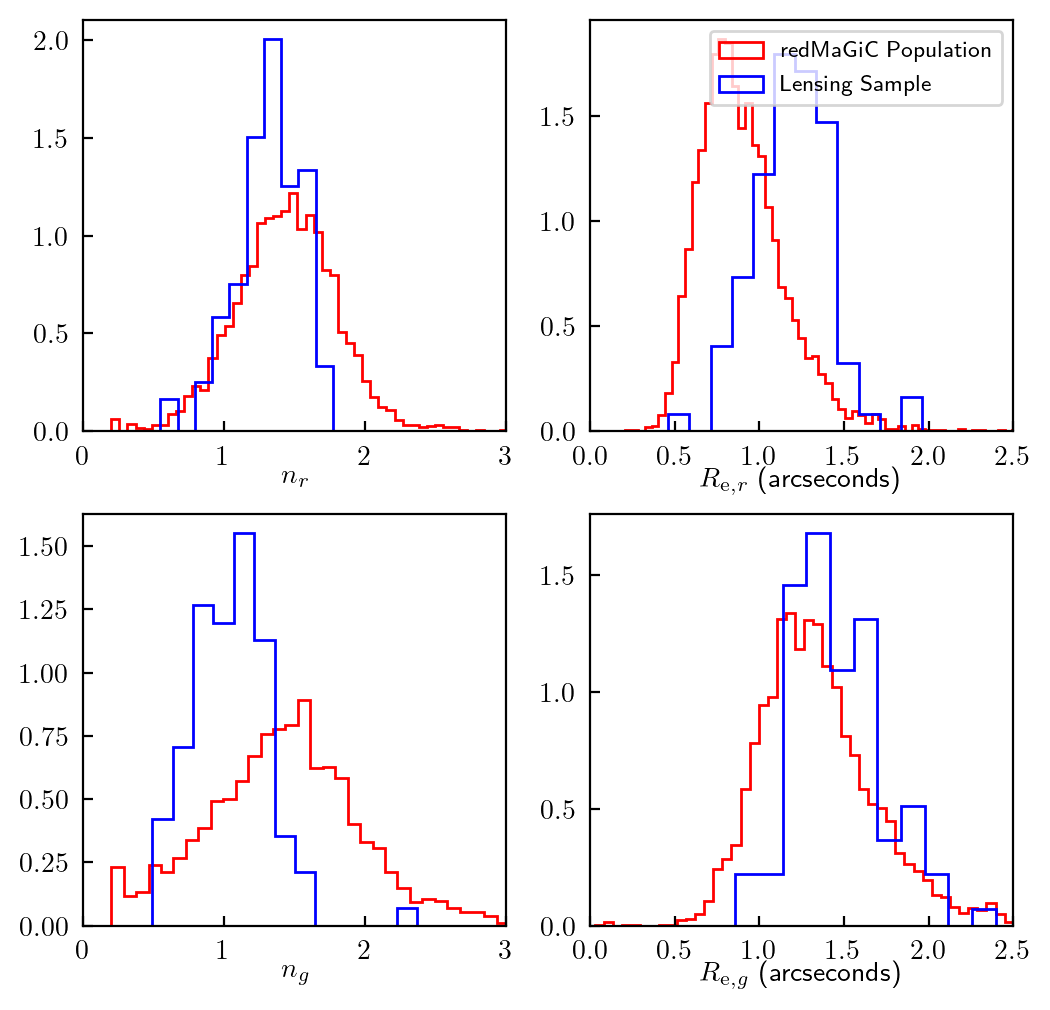

In [55]:
fig, ((nrplot, rrplot), (ngplot, rgplot)) = plt.subplots(2,2, figsize=(6,6))

nrplot.hist(des_nr#, des_rr
            , color='r', bins='auto', density=True, histtype='step'
            #, s=3, c='r'
        )

nrplot.hist(sl_nr#, des_rr
            , color='b', bins='auto', density=True, histtype='step'
            #, s=3, c='r'
        )

nrplot.set_xlabel(r'$n_r$', labelpad=-1)
nrplot.set_xlim(0,3)

rrplot.hist(des_rr#, des_rr
            , color='r', bins='auto', density=True, histtype='step', label='redMaGiC Population'
            #, s=3, c='r'
        )

rrplot.hist(sl_rr#, des_rr
            , color='b', bins='auto', density=True, histtype='step', label='Lensing Sample'
            #, s=3, c='r'
        )

rrplot.set_xlabel(r'$R_{{\rm e},r}$ (arcseconds)', labelpad=-1)
rrplot.set_xlim(0,2.5)

rrplot.legend(loc='upper right', fontsize=8)

ngplot.hist(des_ng#, des_rr
            , color='r', bins='auto', density=True, histtype='step'
            #, s=3, c='r'
        )

ngplot.hist(sl_ng#, des_rr
            , color='b', bins='auto', density=True, histtype='step'
            #, s=3, c='r'
        )

ngplot.set_xlabel(r'$n_g$', labelpad=-1)
ngplot.set_xlim(0,3)

rgplot.hist(des_rg#, des_rr
            , color='r', bins='auto', density=True, histtype='step'
            #, s=3, c='r'
        )

rgplot.hist(sl_rg#, des_rr
            , color='b', bins='auto', density=True, histtype='step'
            #, s=3, c='r'
        )

rgplot.set_xlabel(r'$R_{{\rm e},g}$ (arcseconds)', labelpad=-1)
rgplot.set_xlim(0,2.5)